# The Search for Exoplanets
### Matthew Williams

# 1.0 Introduction

An exoplanet is defined any planet that is outside of our solar system. For a long time it was simply assumed that planets existed that orbited other stars in the universe. In 1992, though, the first exoplanet as discovered. After that, the science of exoplanet exploration grew dramatically. This report analyzes a dataset of 5,312 exoplanets, their physical attributes, the methods used to prove their existance, and the telescopes that made it possible.


# 2.0 Import Libraries & Data

In [1]:
# Import Libraries
import numpy as np
from numpy import nan
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML
import re

# Supress FutureWarnings until Kaggle updates Seaborn to 0.13.0
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The data analyzed in this report was downloaded from the NASA Exoplanet Archive on March 29th, 2023 as a tab separated value text file. Comma separated value text files are available, however, the complete dataset includes URL links with commas in them and made importing the data cumbersome. The availability of tab separated values allowed for an easier way to import the data.

https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS

In [2]:
# Read the tab separated value data file
exoData = pd.read_csv('../input/exoplanets/exo_v04.tab', sep='\t')
exoData.head()

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,sy_snum,sy_pnum,...,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,sy_kepmag_reflink,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,2,1,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,2.0,1,2,0,0,0
1,2,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,1,0,0,0
2,3,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,1,0,0,0
3,4,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,2,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,4,1,0,0
4,5,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,3,1,...,6.095,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,4,3,0,0


## 2.1 Remove Unnecessary Data

The full data set includes data on 5,312 exoplanets with 313 attributes. For this analysis, only a particular set of attributes is needed. The list of desired attributes is defined in the variable 'keepColumns' below.

In [3]:
# Store column names
colNames = exoData.columns

# Create a list of columns to keep for analysis
keepColumns = {'pl_name', 'discoverymethod', 'disc_facility', 'disc_telescope', 'sy_snum', 'sy_pnum', \
       'disc_year', 'disc_facility', 'pl_orbper', 'pl_rade', 'pl_bmasse', 'sy_dist'}

# Create an empty list to store column numbers to drop
dropColumns = []

# Loop over column names and append column numbers to the drop list that aren't in keepColumns
i=0
for name in colNames:
    if name not in keepColumns:
        dropColumns.append(i)       
    i += 1

# Drop unwanted columns
exoData = exoData.drop(exoData.columns[dropColumns], axis=1)
exoData.head()

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,disc_telescope,pl_orbper,pl_rade,pl_bmasse,sy_dist
0,11 Com b,2,1,Radial Velocity,2007,Xinglong Station,2.16 m Telescope,326.030000,12.1,6165.60000,93.1846
1,11 UMi b,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,2.0 m Alfred Jensch Telescope,516.219970,12.3,4684.81420,125.3210
2,14 And b,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,1.88 m Telescope,185.840000,12.9,1525.50000,75.4392
3,14 Her b,1,2,Radial Velocity,2002,W. M. Keck Observatory,10 m Keck I Telescope,1765.038901,12.6,2586.74645,17.9323
4,16 Cyg B b,3,1,Radial Velocity,1996,Multiple Observatories,Multiple Telescopes,798.500000,13.5,565.73740,21.1397


The attributes selected are as follows:
- pl_name: exoplanet name
- sy_snum: number of stars in the system
- sy_pnum: number of planets in the system
- discoverymethod: method used to detect the exoplanet
- disc_year: year the planet was discovered
- disc_facility: name of the observatory or telescope used
- disc_telescope: the specific telescope used, including the focal length in many cases
- pl_orbper: orbital period of the exoplanet (number of Earth years it takes to go around it's own star)
- pl_rade: exoplanet radius (reported as a ratio of Earth radii)
- pl_bmasse: exoplanet mass (reported as a ratio of Earth masses)
- sy_dist: distance from earth to the exoplanet's system (reported in parsecs)

# 3.0 Discovery Methods and Facilities

## 3.1 Discoveries Per Year

The history of exoplanet discovery is short in relation to how long mankind has studied the skies. As mentioned previously, the existence of the first explanet was confirmed in 1992, 31 years ago. How the rate of exoplanet discovery has changed over time can be understood by looking at a histogram of discoveries per year since 1992.

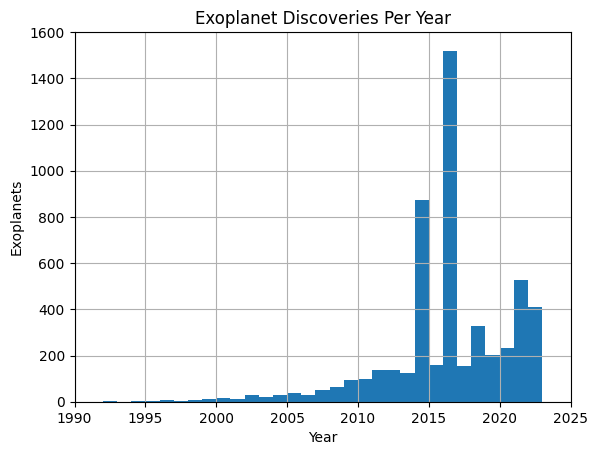

In [4]:
# calculate number of years in the data set
numBins = exoData['disc_year'].max()-exoData['disc_year'].min()

# create a histogram of exoplanet discoveries per year
fig = plt.figure()
exoData['disc_year'].hist(bins=numBins)
plt.xlabel("Year")
plt.xlim(1990,2025)
plt.ylabel("Exoplanets")
plt.ylim(0,1600)
plt.title(label="Exoplanet Discoveries Per Year");

The rate of discovery started out slowly with few discoveries each year. Around 2002, the rate of discovery started to increase with banner years occuring in 2014 and 2016.

## 3.2 Discovery Methods

There are a number of different methods used to detect exoplanets. Understanding how these planets are identified is important in understanding the planets themselves. Below is a list of reported methods used in the discovery of the exoplanets in this data set.

In [5]:
print("Number of methods used: ", len(exoData['discoverymethod'].unique()))
print("Methods: ", exoData['discoverymethod'].unique())

Number of methods used:  11
Methods:  ['Radial Velocity' 'Imaging' 'Eclipse Timing Variations' 'Transit'
 'Astrometry' 'Disk Kinematics' 'Orbital Brightness Modulation'
 'Pulsation Timing Variations' 'Microlensing' 'Transit Timing Variations'
 'Pulsar Timing']


In total, 11 methods have been employed to confirm the existance of exoplanets. Most of these methods rely on distortions of a stars light. This can take the form of dimming the star's brightness, bending the light, or modifying the pulsing of a star to name a few. "Imaging" refers to direct imaging where planets are actually percieved by the telescope via video or photographs. According to Nasa, the only planets that can be seen through direct imaging are newly formed gas giants that have not yet cooled off (How We Find and Characterize | Discovery – Exoplanet Exploration: Planets Beyond Our Solar System, n.d.).

The plot below shows the most fruitful methods of searching for exoplanets.

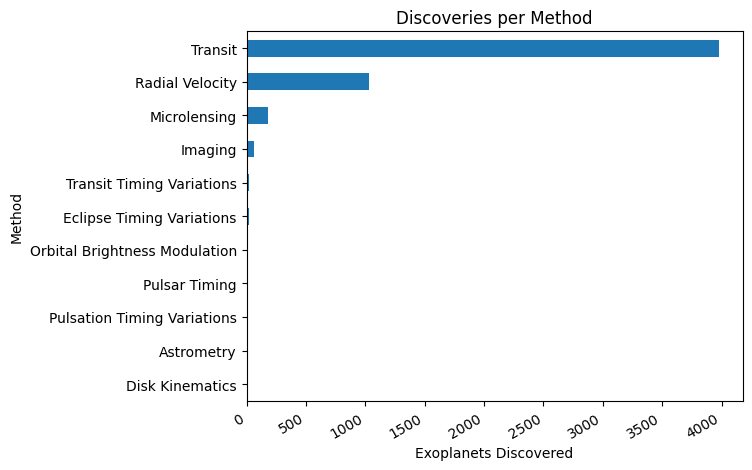

In [6]:
fig, ax = plt.subplots()

# Count discoveries made using each method
discoveryCounts = exoData['discoverymethod'].value_counts().sort_values()
discoveryCounts.plot(ax=ax, kind='barh')

# Plot discoveries per method
plt.title("Discoveries per Method")
plt.xlabel("Exoplanets Discovered")
plt.ylabel("Method")
plt.xticks(rotation=30, horizontalalignment='right');

The "transit" discovery method is by far the most successful method for detecting exoplanets. With this method, a telescope will focus in on a patch of sky and monitor the brightness of those stars. As planets pass in front of the star, the star will appear to dim (How We Find and Characterize | Discovery – Exoplanet Exploration: Planets Beyond Our Solar System, n.d.).

## 3.3 Exploration Facilities

There are 67 facilities responsible for the exoplanet discoveries made to date. While the total below states that there are 68, the Discoveries Per Facility plot below denotes one facility as "Multiple Observatories", a label likely used for exoplanets where a single observatory cannot be determined or designated as the original discoverer.

In [7]:
print("Number of facilities that have discovered exoplanets: ", len(exoData['disc_facility'].unique()))

Number of facilities that have discovered exoplanets:  68


The plot below shows the number of discoveries made by the top 10 exoplanet exploring facilities.

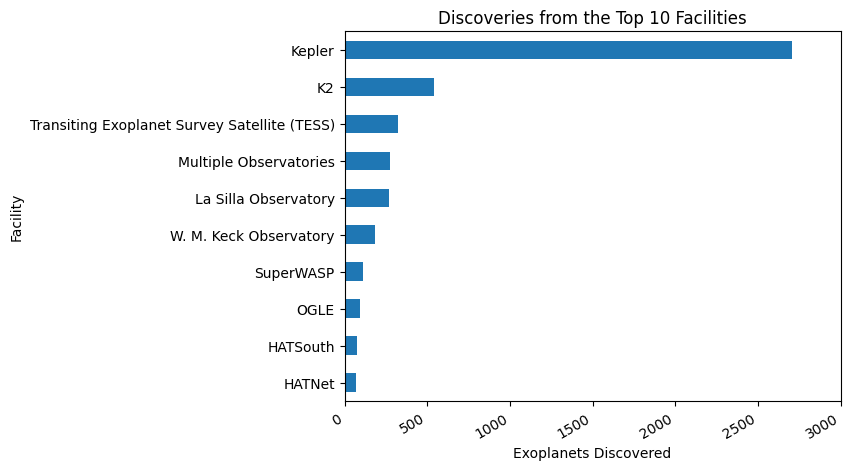

In [8]:
# Create a figure for the plot
fig, ax = plt.subplots()

# Count discoveries made using each method
exoData['disc_facility'].value_counts().sort_values()[-10:].plot(ax=ax, kind='barh')

# Plot number of discoveries for the 10 most productive facilities
plt.title("Discoveries from the Top 10 Facilities")
plt.xlabel("Exoplanets Discovered")
plt.xlim(0,3000)
plt.ylabel("Facility")
plt.xticks(rotation=30, horizontalalignment='right');

The Kepler Space Telescope was the most productive facility used in exoplanet exploration. As the data below shows, Kepler was used to discovered more exoplanets than all of the other facilities combined. Interestingly, the Kepler Space Telescope faced a loss of functionality that resulted in the Kepler mission being terminated. Undetered, scientists were able to modify the way in which the Kepler satellite was being used and launched the K2 mission (the second most prolific discovery facility). (Kepler and K2 Missions, n.d.)

In [9]:
# Compare Kepler discoveries to discoveries made by all other facilities combined
keplerDiscoveries = exoData['disc_facility'].loc[exoData['disc_facility'] == 'Kepler'].count()
k2Discoveries = exoData['disc_facility'].loc[exoData['disc_facility'] == 'K2'].count()
otherFacilityDiscoveries = len(exoData) - keplerDiscoveries - k2Discoveries
print('Discoveries made by Kepler Space Telescope: ', keplerDiscoveries + k2Discoveries)
print('Discoveries made by all other facilities combined: ', otherFacilityDiscoveries)

Discoveries made by Kepler Space Telescope:  3252
Discoveries made by all other facilities combined:  2060


In [10]:
Image(url= "https://images-assets.nasa.gov/image/KSC-2009-1645/KSC-2009-1645~orig.jpg", width=500)

Kepler Space Telescope preparing for launch.
Photo by: NASA/Troy Cryder
https://images.nasa.gov/details/KSC-2009-1645

## 3.4 Telescopes

In addition to the discovery facility, the data set includes the discovery telescope. Looking at the data for each attribute, the telescope data includes the focal length of the instrument. Like a camera lens, telescopes have focal lengths which can be an indication of the size of the telescope. The larger the focal length, the larger the telescope. Below is a list of the unique telescopes found in this data set.

In [11]:
exoData['disc_telescope'].unique()

array(['2.16 m Telescope', '2.0 m Alfred Jensch Telescope',
       '1.88 m Telescope', '10 m Keck I Telescope', 'Multiple Telescopes',
       'Coude Auxiliary Telescope', '8.19 m Gemini North Telescope',
       '3.0 m C. Donald Shane Telescope', '8.2 m Subaru Telescope',
       '8.2 m ESO VLT UT4 Yepun Telescope', '10 m Keck II Telescope',
       '1.5 m CTIO Telescope', '2.4 m Hubble Space Telescope',
       '0.95 m Kepler Telescope', '8.19 m Gemini South Telescope',
       '1.93 m Telescope', '9.2 m Hobby-Eberly Telescope',
       '3.9 m Anglo-Australian Telescope', '1.8 m Telescope',
       '0.6 m Coude Auxiliary Telescope',
       '8.2 m ESO VLT UT3 Melipal Telescope', '0.1 m TESS Telescope',
       '3.58 m Telescopio Nazionale Galileo', '0.4 m Telescope',
       '3.6 m ESO Telescope', '1.2 m Leonhard Euler Telescope',
       '3.5 m telescope', '3.2 m telescope', '0.27 m CoRoT Telescope',
       '8.2 m ESO VLT UT1 Antu Telescope',
       '2.4 m Lijiang Station Telescope',
       '0.

Rather than searching for the maximum and minimum focal lengths (i.e. smallest and largest telescopes) manually, these values can be extracted from these strings using regular expressions. Skimming over the list of descriptions, a number of units can be found. Some focal lengths are in meters while others are in millimeters. The whitespace and characters between the numeric values and the units also varies. Each of these is accounted for in the regular expression patterns below.

In [12]:
# Extract all scopes with focal lengths in meters
meterScopes = exoData['disc_telescope'].str.extract('([0-9\.0-9]+\s[m]|[0-9\.0-9]+\-[m]|[0-9\.0-9]+m\s)', \
                                                    expand=False).unique()

# Remove nan values
meterScopes = [x for x in meterScopes if x is not nan]

# Remove 'm' and convert to meters
meterScopes = [float(x[:-2]) for x in meterScopes]

# Look at the first few values
meterScopes[:5]

[2.16, 2.0, 1.88, 10.0, 8.19]

In [13]:
# Extract all scopes with focal lengths in millimeters
millimeterScopes = exoData['disc_telescope'].str.extract('([0-9\.0-9]+\s?mm)', expand=False).unique()

# Remove nan value
millimeterScopes = [x for x in millimeterScopes if x is not nan]

# Remove 'mm' and convert to meters
millimeterScopes = [int(x[:-2])/1000 for x in millimeterScopes]

# View values
millimeterScopes

[0.279, 0.2, 0.08, 0.4]

In [14]:
# Combine telescope focal length lists
focalLengths = meterScopes + millimeterScopes

print('Range of telescope focal lengths')
print('\tLargest: ', max(focalLengths), 'm')
print('\tSmallest: ', min(focalLengths), 'm')

Range of telescope focal lengths
	Largest:  305.0 m
	Smallest:  0.08 m


The range of telescopes used for exoplanet exploration is quite wide. The largest and smallest telescopes can be found using the lines of code below:

In [15]:
print('Largest telescope: \t',exoData['disc_telescope'][exoData['disc_telescope'].str.contains("305")].unique()[0])

Largest telescope: 	 305 m Arecibo Radio Telescope


Arecibo is the largest telescope in the data set. In fact, it was the second largest telescope in the world. This telescope was used for a variety of scientific pursuits until it collapsed in 2020. (Howell & Stein, 2022)

In [16]:
Image(url= "https://upload.wikimedia.org/wikipedia/commons/c/cd/Arecibo_Observatory_Aerial_View.jpg", width=500)

Arecibo, Panama. Photo by: Author H. Schweiker/WIYN and NOAO/AURA/NSF

In [17]:
print('Smallest telescope: \t',exoData['disc_telescope'][exoData['disc_telescope'].str.contains("80")].unique()[0])

Smallest telescope: 	 Mamiya 645 80mm f/1.9


In [18]:
exoData['disc_facility'].loc[exoData['disc_telescope']=='Mamiya 645 80mm f/1.9'].unique()

array(['KELT', 'KELT-South', 'KELT-North'], dtype=object)

The smallest telescope uses the Mamiya 80mm f/1.9 lens. This is a medium format camera lens widely used in professional and hobby photography.

In [19]:
Image(url= "https://astronomy.osu.edu/sites/default/files/styles/slideshow_image/public/2024-01/KELT-N.jpg", width=500)

The KELT-South telescope with the Mamiya 645 80mm f1.9 lens. Photo from https://keltsurvey.org/telescopes

# 4.0 Exploring Exoplanets

With the above understanding of the methods, facilities, and telescopes used for exoplanet exploration, the next part of this report focuses on the planets themselves.

## 4.1 Basic Exoplanet Statistics

To get a sense of the selected exoplanet attributes the describe method is used may be used on the exoData dataframe.

In [20]:
exoData.describe()

,sy_snum,sy_pnum,disc_year,pl_orbper,pl_rade,pl_bmasse,sy_dist
count,5312.000000,5312.000000,5312.000000,5.095000e+03,5295.000000,5288.000000,5294.000000
mean,1.101657,1.761295,2015.814194,8.277421e+04,5.677536,458.429938,684.981687
std,0.337542,1.151597,4.348273,5.633944e+06,5.334342,3737.258351,1052.595503
min,1.000000,1.000000,1992.000000,9.070629e-02,0.296000,0.020000,1.301190
25%,1.000000,1.000000,2014.000000,4.449656e+00,1.770000,4.000000,121.402750
50%,1.000000,1.000000,2016.000000,1.155562e+01,2.759000,8.568065,420.516000
75%,1.000000,2.000000,2019.000000,4.099920e+01,11.882000,162.092490,854.204250
max,4.000000,8.000000,2023.000000,4.020000e+08,77.342000,239000.000000,8500.000000


Several of the above statistical measures are noteworthy. The first is the standard deviation of both the planet mass and system distance. These deviations values of 3,737 and 685 respectively are very large and as such the variability of these measures is also large.

Other interesting measures include the minimum and maximum values for planet mass. The minimum value is 0.02, a planet that is only 2% of the mass of earth. To put that in perspective, Earth's moon is 0.01 Earth masses, this the smallest exoplanet discovered is only twice the size of the moon. At the other end of the planet masses is a planet that is 239,000 times that of Earth.

The maximum value for 'sy_snum' indicates that a star system has been discovered that is comprised of four stars, an interesting contrast to our own single star system.

Finally, the maximum number of planets discovered in a single system is 8. This is significant given the nature of the discovery methods used to detect exoplanets. These will be discussed in more detail below but, in short, many of the methods rely on the fluctuation in brightness of a star that occurs when a planet passes between the observatory and the star.

In [21]:
# Look at the system with 8 exoplanets
exoData.loc[exoData['sy_pnum']==8]

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,disc_telescope,pl_orbper,pl_rade,pl_bmasse,sy_dist
1861,KOI-351 b,1,8,Transit,2013,Kepler,0.95 m Kepler Telescope,7.008151,1.31,2.270,848.254
1862,KOI-351 c,1,8,Transit,2013,Kepler,0.95 m Kepler Telescope,8.719375,1.19,1.810,848.254
1863,KOI-351 d,1,8,Transit,2013,Kepler,0.95 m Kepler Telescope,59.736670,2.87,8.600,848.254
1864,KOI-351 e,1,8,Transit,2013,Kepler,0.95 m Kepler Telescope,91.939130,2.66,7.560,848.254
1865,KOI-351 f,1,8,Transit,2013,Kepler,0.95 m Kepler Telescope,124.914400,2.88,8.650,848.254
1866,KOI-351 g,1,8,Transit,2013,Kepler,0.95 m Kepler Telescope,210.606970,8.10,254.264,848.254
1867,KOI-351 h,1,8,Transit,2013,Kepler,0.95 m Kepler Telescope,331.600590,11.30,381.396,848.254
4437,Kepler-90 i,1,8,Transit,2017,Kepler,0.95 m Kepler Telescope,14.449120,1.32,2.300,848.254


This is a significant discovery given the number of planets discovered coupled with the method used, namely, the transit method. With the transit method, exoplanets are confirmed by measuring the dimming of a star as a planet passes in front of it. Eight planets orbiting a single star (as denoted by sy_snum = 1) would create a complex dimming pattern.

The longest orbital period (pl_orbper) is 331.6 days. This suggests that the Kepler Telescope was aimed with this particular system in its sights for an extended period of time.

Note that the distance to the system (sy_dist) confirms that all eight of these planets are the same distance from our own system.

#### Exoplanet with the longest orbital period

Returning to the .describe() function results above, one additional attribute value worth exploring is the maximum orbital period. Below is the exoplanet record for the longest orbital period.

In [22]:
exoData.loc[exoData['pl_orbper']== exoData['pl_orbper'].max()]

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,disc_telescope,pl_orbper,pl_rade,pl_bmasse,sy_dist
78,COCONUTS-2 b,1,1,Imaging,2021,NASA Infrared Telescope Facility (IRTF),3.2 m telescope,402000000.0,12.442,2002.31896,10.8864


Coconuts-2b has an orbital period of 4.02E+8 days, or 1.1 million (Earth) years. This planet was discovered through direct imaging at the Nasa Infrared Telescope Facility located in Maunakea, Hawaii. While direct imaging is not the most prolific discovery method (as illustrated above), it represents an important opportunity for planetary discovery.

As previously mentioned, most methods of detecting exoplanets rely on indirect methods of detection, namely the distortion of light. When planets repeatedly pass between the observatory and their system's star, the light will dim, pulse, or bend at a detectable rate. With an orbital period of 1.1 million years, such a pattern would not have been detectable. Certainly not within the 31 years scientists have been observing exoplanets.

Direct imaging made the discovery of this planet possible. This method, however, only works with planets of a particular size and makeup such that it can reflect infrared light from the star around which it orbits. Generally, this is limited to large gas giants. Thus there are gaps in the detection methods that prevent a variety of planet sizes and types from being discovered.

## 4.2 Planet Size

One way to understand how the science of exoplanet discovery has changed over time is to look at the size of the planets discovered. A reasonable first assumption might be that larger planets would be easier to spot than smaller planets.

Further insights can be made by coloring each exoplanet data point according to the discovery method used to identify the planet. This next plot incorporates both attributes.

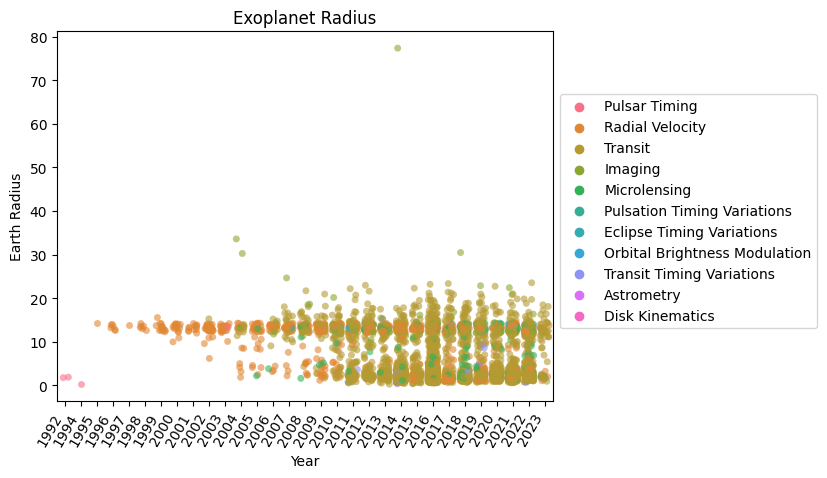

In [23]:
sns.stripplot(data = exoData, x='disc_year', y='pl_rade', jitter=0.3, hue='discoverymethod', alpha=0.60);
plt.title("Exoplanet Radius")

plt.ylabel("Earth Radius")
plt.xlabel('Year')
plt.xticks(rotation=60, horizontalalignment='right')
plt.legend(bbox_to_anchor=(1.0, 0.85));

This plot shows that the first planets discovered using the pulsar timing method and have a relatively similar radius as that of Earth. In 1996, a "streak" of exoplanet discoveries are made that are commonly 11 to 14 times the radius of earth and this is done the transit method and radial velocity methods.

In 2004, a second "streak" of planet discoveries are made which also have a similarly sized radius to that of Earth. Interestingly, there is a loosely populated gap between these two clusters in the range of 6 to 10 times the radius of Earth. A notable exception occured in 2016 when the planets discovered were in a range of sizes from approximately 1 to 20 times radius.

One planet worth investigating further is the lone planet nearly 80 times the size of earth discovered in 2014. This could be a typo in the data set, or it could be a one of a kind discovery.

In [24]:
exoData.loc[exoData['pl_rade']== exoData['pl_rade'].max()]

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,disc_telescope,pl_orbper,pl_rade,pl_bmasse,sy_dist
452,HD 100546 b,1,1,Imaging,2014,Paranal Observatory,8.2 m ESO VLT UT4 Yepun Telescope,NaN,77.342,239000.0,109.677


According to Quanz et al. (2015), HD 100546b has a radius of 6.9 R_jupiter. The conversion to Earth radius is 10.998

In [25]:
rJupiter = 6.9
rEarth = rJupiter * 10.998
print("HD 100546 radius: ", rEarth, "R_earth")

HD 100546 radius:  75.8862 R_earth


This value confirms the radius reported in the Nasa data set.

## 4.3 Field of Vision

Space telescopes, like our eyes and cameras too, have limits to how far they can "see" into space. This is called "field of vision". The attribute "sy_dist" provides the distance each exoplanet system is from our own system in parsecs.

The plot below shows how scientists field of vision has changed over time and is again colored by the discovery method used.

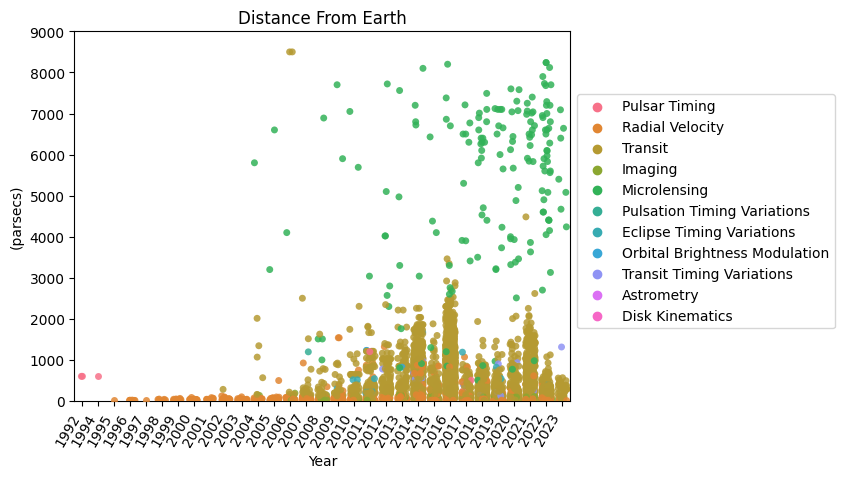

In [26]:
# Plot the distance of each exoplanet as a function of the year it was discovered
sns.stripplot(data = exoData, x='disc_year', y='sy_dist', jitter=0.3, hue='discoverymethod', alpha=0.85);
plt.title("Distance From Earth")
plt.ylabel("(parsecs)")
plt.ylim(0,9000)
plt.xlabel('Year')
plt.xticks(rotation=60, horizontalalignment='right')
plt.legend(bbox_to_anchor=(1.0, 0.85));

In [27]:
# Look up the planet(s) furthest from our system
exoData.loc[exoData['sy_dist']==max(exoData['sy_dist'])]

,pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,disc_telescope,pl_orbper,pl_rade,pl_bmasse,sy_dist
4780,SWEEPS-11 b,1,1,Transit,2006,Hubble Space Telescope,2.4 m Hubble Space Telescope,1.796,12.666,3082.82,8500.0
4781,SWEEPS-4 b,1,1,Transit,2006,Hubble Space Telescope,2.4 m Hubble Space Telescope,4.200,9.079,1207.70,8500.0


This plot suggests that the limit to how far we can see is 8500 parsecs. One parsec is equal to 3.26 light years, so the furthest planets we have seen are around 28,000 light years away.

Interestingly, the microlensing method is by-in-large the most effective method for detecting planets beyond approximately 4000 parsecs. It was the transit method, however, that was responsible for the discovery of the two furthest exoplanets.

# 5.0 Conclusion

The science of confirming the existence of exoplanets is relatively young having began with the discovery of the first exoplanet only 31 years ago. Since then, numerous methods have been developed as well as telescopes in a wide range of sizes. Once scientists knew what to look for and developed state of the art tools to use thousands of planets have subsequently been found.

The above plot of planet size and time show that our abilities have expanded over time. However, there are some gaps in the planet sizes scientists are finding. This may be due to limitations in the methods and telescopes themselves or it could be that there are physics at play that limit most planets to particular sizes. It may also be that scientists have only covered a portion of the sky and as other areas of space are explored the distribution of planet sizes will fill in.

It is also apparent that the pursuit of exoplanet science requires investment. With the decommissioning of Kepler/K2 and the collapse of Arecibo it is clear that telescopes have a lifespan. The James Webb telescope recently took to the skies though is unrepresented in this data set. Many of the telescopes used for exoplanet discovery are aso used for exploring other aspects of the universe.

Analyzing the telescopes themselves also revealed that a wide range of equipment can be used to look for exoplanets. Kepler's 0.95m telescope was used in discovering the majority of all exoplanets currently known. That is a relatively small telescope in comparison to Arecibo at 305m. Yet, the 80mm Mamiya that fits in the palm of an adult's hand can also be used to good effect.

In future analysis, it would be interesting to see if the data set has a parameter that would allow for the isolation of planets within the habitable zone of their own solar systems. These planets may be worth further study to see if they could support life.

If this history of exoplanet research is an indication of its future, there will likely be many more planets to analyze in years to come. Applying correlation analysis or k-means clustering may reveal even more about these distant planets.

# References

1. How We Find and Characterize | Discovery – Exoplanet Exploration: Planets Beyond our Solar System. (n.d.). Exoplanet Exploration: Planets Beyond Our Solar System. https://exoplanets.nasa.gov/discovery/how-we-find-and-characterize/
1. Kepler and K2 Missions. (n.d.). https://mobile.arc.nasa.gov/public/iexplore/missions/pages/39.htm
1. Howell, E., & Stein, V. (2022). Arecibo Observatory: Watching for asteroids, waiting for E.T. Space.com. https://www.space.com/20984-arecibo-observatory.html
1. Quanz, S. P., Amara, A., Meyer, M., Girard, J., Kenworthy, M. A., & Kasper, M. (2015). CONFIRMATION AND CHARACTERIZATION OF THE PROTOPLANET HD 100546 b—DIRECT EVIDENCE FOR GAS GIANT PLANET FORMATION AT 50 AU. The Astrophysical Journal, 807(1), 64. https://doi.org/10.1088/0004-637x/807/1/64